In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [11]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\singh\AppData\Local\Temp\ipykernel_5868\3729526159.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200
2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000
2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000
2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800
...,...,...,...,...,...
2025-08-04,203.350006,207.880005,201.679993,204.509995,75109300
2025-08-05,202.919998,205.339996,202.160004,203.399994,44155100


In [12]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200
2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000
2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000
2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800


In [13]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-04,203.350006,207.880005,201.679993,204.509995,75109300
2025-08-05,202.919998,205.339996,202.160004,203.399994,44155100
2025-08-06,213.250000,215.380005,205.589996,205.630005,108483100
2025-08-07,220.029999,220.850006,216.580002,218.880005,90224800
2025-08-08,229.350006,231.000000,219.250000,220.830002,113696100


# 2. Data Exploration & visualization

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.shape

(2514, 5)

In [16]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [17]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.305203,106.364375,104.136178,105.203395,1.080563e+08
std,69.320082,70.002288,68.553949,69.242296,6.287985e+07
min,20.647455,20.951429,20.448615,20.569746,2.323470e+07
25%,39.755029,40.254181,39.517430,39.885874,6.581810e+07
50%,105.908691,107.739051,104.242738,105.837894,9.328520e+07
75%,166.397644,168.087979,164.752886,166.528441,1.309691e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [18]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [19]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200
2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000
2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000
2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800


In [20]:
df = df.reset_index()

In [21]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200
1,2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000
2,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
3,2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000
4,2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800


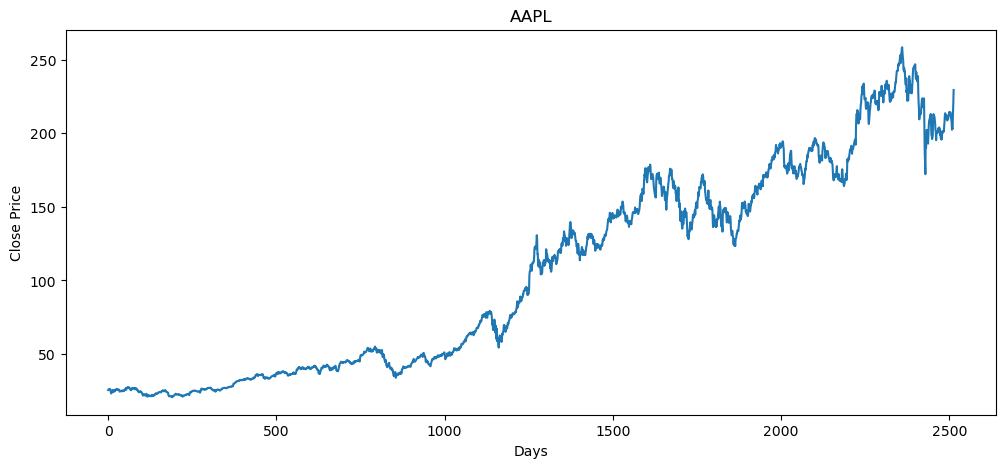

In [22]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Close Price');

# 3. Feature Engineering

In [23]:
temp_df = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[:5])/5)

30.0


In [24]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [25]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days moving AVG

In [26]:
df['MA100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200,NaN
1,2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000,NaN
2,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200,NaN
3,2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000,NaN
4,2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800,NaN
...,...,...,...,...,...,...,...
98,2015-12-30,24.248274,24.560075,24.216642,24.532963,100855200,NaN
99,2015-12-31,23.782827,24.182747,23.683412,24.178229,163649200,25.614991
100,2016-01-04,23.803156,23.807676,23.046245,23.184071,270597600,25.597692


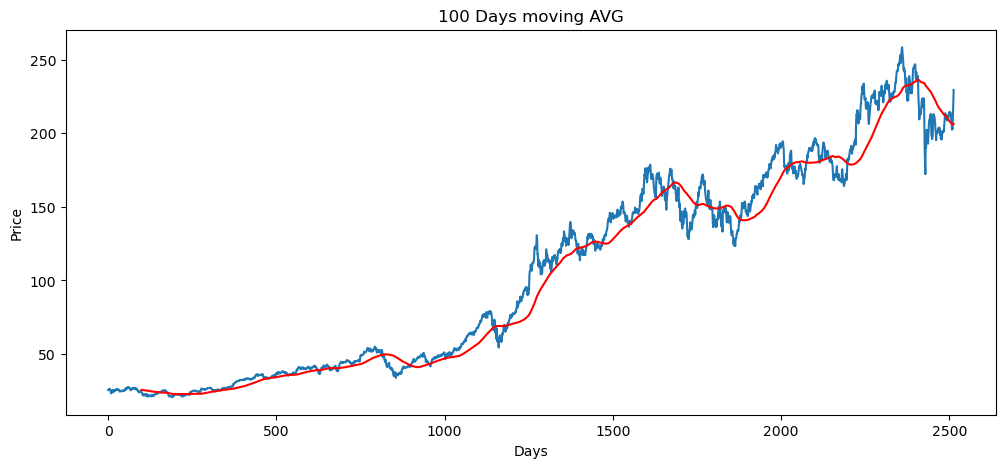

In [27]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA100'], 'r')
plt.title('100 Days moving AVG');
plt.xlabel('Days');
plt.ylabel('Price');

### 200 moving days AVG

In [28]:
df['MA200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA100,MA200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200,NaN,NaN
1,2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000,NaN,NaN
2,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200,NaN,NaN
3,2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000,NaN,NaN
4,2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-05-24,22.375320,22.418744,22.133053,22.219904,140560800,22.752727,NaN
199,2016-05-25,22.768433,22.795858,22.423317,22.551306,152675200,22.742583,24.178787
200,2016-05-26,22.948988,23.022125,22.544449,22.782144,225324800,22.734041,24.165867


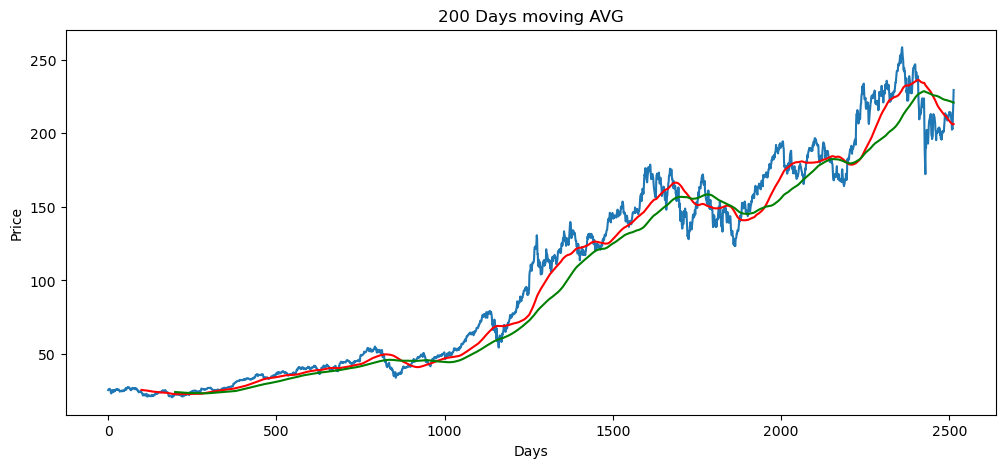

In [29]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA100'], 'r');
plt.plot(df['MA200'], 'g');
plt.title('200 Days moving AVG');
plt.xlabel('Days');
plt.ylabel('Price');

In [30]:
df

Price,Date,Close,High,Low,Open,Volume,MA100,MA200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-11,25.533045,26.588204,25.497049,26.504961,388331200,NaN,NaN
1,2015-08-12,25.926767,25.967264,24.664626,25.317070,404870000,NaN,NaN
2,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200,NaN,NaN
3,2015-08-14,26.088747,26.167490,25.650036,25.719779,171718000,NaN,NaN
4,2015-08-17,26.358730,26.468970,25.985262,26.106751,163538800,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-08-04,203.350006,207.880005,201.679993,204.509995,75109300,206.077757,221.103121
2510,2025-08-05,202.919998,205.339996,202.160004,203.399994,44155100,205.939999,220.952567
2511,2025-08-06,213.250000,215.380005,205.589996,205.630005,108483100,205.978445,220.863976


### calculate % change in each trading session

In [31]:
df['% changed'] = df.Close.pct_change()
df[['Close', '% changed']]

Price,Close,% changed
Ticker,AAPL,
0,25.533045,NaN
1,25.926767,0.015420
2,25.906519,-0.000781
3,26.088747,0.007034
4,26.358730,0.010349
...,...,...
2509,203.350006,0.004793
2510,202.919998,-0.002115
2511,213.250000,0.050907


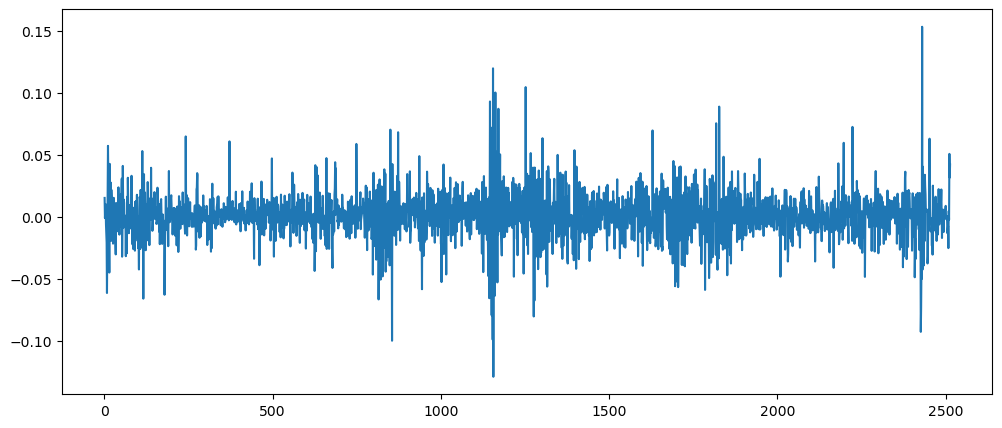

In [32]:
plt.figure(figsize = (12,5))
plt.plot(df['% changed'])

# 4. Data Preprocessing

In [33]:
df.shape

(2514, 9)

In [34]:
# spliting data into training and testing 70% & 30%
dataTraining = pd.DataFrame(df.Close[0:int(len(df)*0.7)]) 
dataTesting = pd.DataFrame(df.Close[int(len(df)*0.7) : int(len(df))])

print(dataTraining)

print(dataTesting)

Ticker        AAPL
0        25.533045
1        25.926767
2        25.906519
3        26.088747
4        26.358730
...            ...
1754    159.943970
1755    158.959778
1756    157.483444
1757    163.506821
1758    163.191864

[1759 rows x 1 columns]
Ticker        AAPL
1759    162.965164
1760    162.492111
1761    162.541382
1762    166.799088
1763    166.059906
...            ...
2509    203.350006
2510    202.919998
2511    213.250000
2512    220.029999
2513    229.350006

[755 rows x 1 columns]


In [35]:
# scaling down the data B/W 0 and 1.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [37]:
data_training_array = scaler.fit_transform(dataTraining)
data_training_array

array([[0.03092181],
       [0.03341375],
       [0.0332856 ],
       ...,
       [0.86606057],
       [0.90418364],
       [0.90219023]], shape=(1759, 1))

In [38]:
# 5. Sequence Creation

In [39]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
x_train.ndim

3

In [41]:
y_train.ndim

1

In [42]:
x_train.shape

(1659, 100, 1)

In [43]:
y_train.shape

(1659,)

# 6. model Building

In [44]:
!pip install tensorflow

In [45]:
import tensorflow as tf
print(tf.__version__)

2.20.0-rc0


In [46]:
# ML model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [47]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0103
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 6.0637e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 5.3589e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 5.6423e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 5.4574e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 5.0572e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 4.9233e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.8159e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.3060e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 4.7461e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.2058e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.3500e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 4.0187e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 3.7757e-04
Epoc

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                     │ (None, 100, 128)         │         66,560 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ lstm_5 (LSTM)                     │ (None, 64)               │         49,408 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ dense_2 (Dense)                   │ (None, 25)               │          1,625 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ dense_3 (Dense)                   │ (None, 1)                │             26 │
└───────────────────────────────────┴──────────────────────────┴────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [50]:
# saved the trained model
model.save('stock_prediction_model.keras')

# 8. preparing test data

In [53]:
dataTraining.tail(100)

Ticker,AAPL
1659,148.024231
1660,152.417160
1661,156.839645
1662,157.851883
1663,161.153976
...,...
1754,159.943970
1755,158.959778
1756,157.483444
1757,163.506821


In [52]:
dataTesting

Ticker,AAPL
1759,162.965164
1760,162.492111
1761,162.541382
1762,166.799088
1763,166.059906
...,...
2509,203.350006
2510,202.919998
2511,213.250000
2512,220.029999


In [55]:
pastHunderedDays = dataTraining.tail(100)
pastHunderedDays

Ticker,AAPL
1659,148.024231
1660,152.417160
1661,156.839645
1662,157.851883
1663,161.153976
...,...
1754,159.943970
1755,158.959778
1756,157.483444
1757,163.506821


In [57]:
final_df = pd.concat([pastHunderedDays, dataTesting], ignore_index=True)
final_df

Ticker,AAPL
0,148.024231
1,152.417160
2,156.839645
3,157.851883
4,161.153976
...,...
850,203.350006
851,202.919998
852,213.250000
853,220.029999


In [58]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.82277452e-01],
       [2.14823596e-01],
       [2.47588715e-01],
       [2.55088136e-01],
       [2.79552544e-01],
       [2.89746255e-01],
       [3.14793090e-01],
       [3.24913771e-01],
       [3.53018685e-01],
       [3.57751354e-01],
       [3.64158726e-01],
       [3.88623020e-01],
       [3.79958632e-01],
       [3.56950517e-01],
       [3.54766304e-01],
       [3.84836795e-01],
       [3.60226780e-01],
       [3.36709042e-01],
       [3.38966058e-01],
       [3.24039905e-01],
       [2.92439978e-01],
       [3.06346998e-01],
       [3.26297260e-01],
       [2.89090573e-01],
       [2.87488899e-01],
       [3.04453885e-01],
       [3.03216003e-01],
       [2.97318141e-01],
       [2.63607031e-01],
       [2.71543273e-01],
       [2.27274549e-01],
       [2.25599733e-01],
       [2.77077118e-01],
       [2.33463398e-01],
       [2.35720753e-01],
       [2.46787765e-01],
       [2.94406234e-01],
       [2.27056026e-01],
       [2.32451838e-01],
       [1.94388694e-01],


In [59]:
input_data.shape

(855, 1)

In [60]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [62]:
x_test

array([[[0.18227745],
        [0.2148236 ],
        [0.24758871],
        ...,
        [0.25235846],
        [0.2969842 ],
        [0.29465076]],

       [[0.2148236 ],
        [0.24758871],
        [0.25508814],
        ...,
        [0.2969842 ],
        [0.29465076],
        [0.29297119]],

       [[0.24758871],
        [0.25508814],
        [0.27955254],
        ...,
        [0.29465076],
        [0.29297119],
        [0.28946646]],

       ...,

       [[0.63703558],
        [0.66522607],
        [0.66899952],
        ...,
        [0.58498617],
        [0.59217267],
        [0.58898684]],

       [[0.66522607],
        [0.66899952],
        [0.65930673],
        ...,
        [0.59217267],
        [0.58898684],
        [0.66551932]],

       [[0.66899952],
        [0.65930673],
        [0.67817432],
        ...,
        [0.58898684],
        [0.66551932],
        [0.71575068]]], shape=(755, 100, 1))

In [63]:
y_test

array([2.92971194e-01, 2.89466460e-01, 2.89831494e-01, 3.21375800e-01,
       3.15899384e-01, 3.42259279e-01, 3.50218130e-01, 3.49049998e-01,
       3.60148890e-01, 3.57227712e-01, 3.38024137e-01, 3.09181467e-01,
       3.06698919e-01, 3.08889576e-01, 3.27144221e-01, 2.80339137e-01,
       2.63982692e-01, 2.45947135e-01, 2.33606743e-01, 2.39010243e-01,
       2.23311176e-01, 2.13964765e-01, 2.24406731e-01, 2.13453785e-01,
       2.34702072e-01, 2.78951578e-01, 2.08926413e-01, 2.19660383e-01,
       1.98192555e-01, 1.85998449e-01, 2.13599618e-01, 2.31270141e-01,
       2.08050172e-01, 2.00894531e-01, 1.84026654e-01, 1.86509655e-01,
       1.93738325e-01, 1.79718822e-01, 1.25976846e-01, 9.47245448e-02,
       1.25757645e-01, 1.52409771e-01, 1.54600314e-01, 1.47517364e-01,
       1.08525412e-01, 1.10934931e-01, 1.00420049e-01, 9.57470699e-02,
       1.29700895e-01, 9.60390746e-02, 1.25465640e-01, 1.35250228e-01,
       1.36053326e-01, 1.32621733e-01, 1.60953084e-01, 1.76871013e-01,
      

# 9. making prediction

In [64]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [65]:
y_predicted

array([[0.28244513],
       [0.2892164 ],
       [0.29071912],
       [0.290139  ],
       [0.2999545 ],
       [0.30809116],
       [0.32228956],
       [0.33638528],
       [0.34505466],
       [0.35287237],
       [0.35647482],
       [0.35050917],
       [0.33358234],
       [0.3186878 ],
       [0.31061354],
       [0.31412816],
       [0.30418766],
       [0.28813925],
       [0.26967293],
       [0.25270307],
       [0.24357055],
       [0.23508489],
       [0.22663228],
       [0.22403541],
       [0.22076988],
       [0.22481048],
       [0.24414173],
       [0.24001484],
       [0.23248075],
       [0.21927333],
       [0.20460911],
       [0.20235755],
       [0.21067975],
       [0.21305823],
       [0.21033916],
       [0.20145625],
       [0.19388774],
       [0.19125393],
       [0.18701102],
       [0.16780297],
       [0.14045817],
       [0.12662965],
       [0.12912007],
       [0.13781285],
       [0.14424779],
       [0.1368003 ],
       [0.12687255],
       [0.115

In [66]:
y_test

array([2.92971194e-01, 2.89466460e-01, 2.89831494e-01, 3.21375800e-01,
       3.15899384e-01, 3.42259279e-01, 3.50218130e-01, 3.49049998e-01,
       3.60148890e-01, 3.57227712e-01, 3.38024137e-01, 3.09181467e-01,
       3.06698919e-01, 3.08889576e-01, 3.27144221e-01, 2.80339137e-01,
       2.63982692e-01, 2.45947135e-01, 2.33606743e-01, 2.39010243e-01,
       2.23311176e-01, 2.13964765e-01, 2.24406731e-01, 2.13453785e-01,
       2.34702072e-01, 2.78951578e-01, 2.08926413e-01, 2.19660383e-01,
       1.98192555e-01, 1.85998449e-01, 2.13599618e-01, 2.31270141e-01,
       2.08050172e-01, 2.00894531e-01, 1.84026654e-01, 1.86509655e-01,
       1.93738325e-01, 1.79718822e-01, 1.25976846e-01, 9.47245448e-02,
       1.25757645e-01, 1.52409771e-01, 1.54600314e-01, 1.47517364e-01,
       1.08525412e-01, 1.10934931e-01, 1.00420049e-01, 9.57470699e-02,
       1.29700895e-01, 9.60390746e-02, 1.25465640e-01, 1.35250228e-01,
       1.36053326e-01, 1.32621733e-01, 1.60953084e-01, 1.76871013e-01,
      

In [67]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [68]:
y_predicted

array([161.54442 , 162.45836 , 162.6612  , 162.58289 , 163.90775 ,
       165.00598 , 166.92242 , 168.825   , 169.99515 , 171.05035 ,
       171.53659 , 170.73137 , 168.44667 , 166.43626 , 165.34644 ,
       165.82083 , 164.47911 , 162.31297 , 159.82048 , 157.52995 ,
       156.29729 , 155.15193 , 154.01103 , 153.66052 , 153.21976 ,
       153.76514 , 156.37437 , 155.81735 , 154.80045 , 153.01776 ,
       151.03847 , 150.73454 , 151.85785 , 152.17888 , 151.81187 ,
       150.6129  , 149.59132 , 149.23582 , 148.66315 , 146.07053 ,
       142.37967 , 140.51315 , 140.84929 , 142.0226  , 142.89116 ,
       141.88593 , 140.54593 , 139.06766 , 137.77902 , 138.14659 ,
       137.82622 , 138.38116 , 139.48224 , 140.50609 , 141.0651  ,
       142.35294 , 144.16849 , 146.49188 , 147.4285  , 146.24857 ,
       147.83696 , 149.27895 , 149.43762 , 147.4501  , 143.61656 ,
       140.22804 , 138.12785 , 137.26372 , 135.90541 , 137.87666 ,
       141.46227 , 144.24158 , 146.36089 , 147.20012 , 147.860

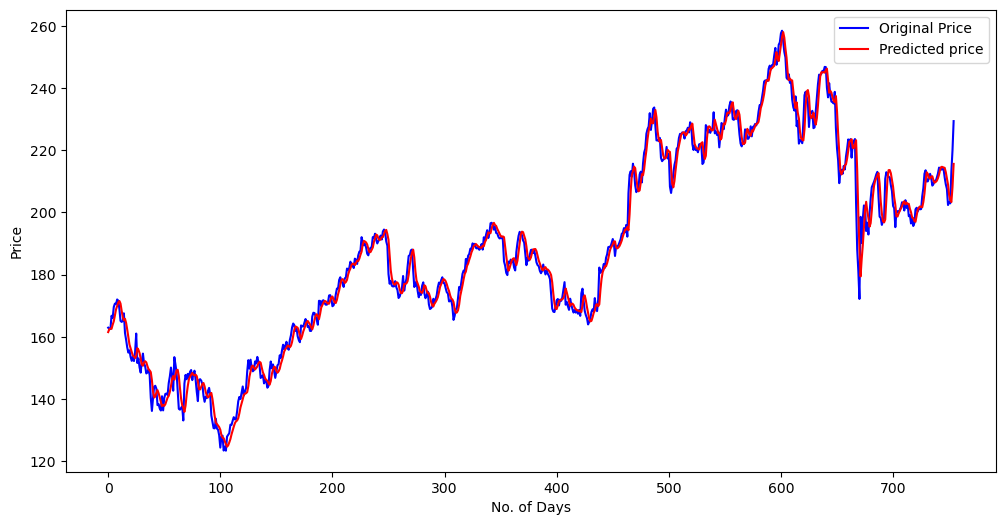

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted price')
plt.xlabel('No. of Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

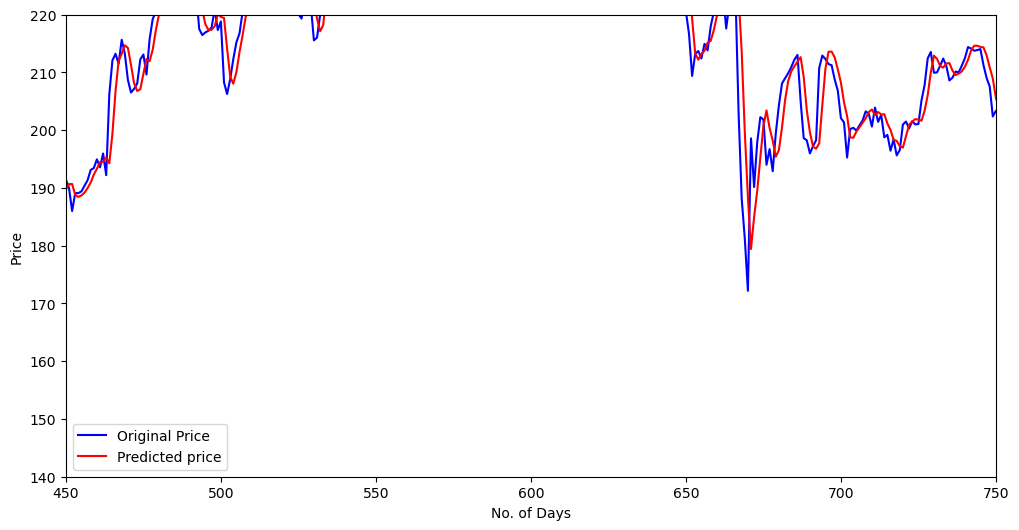

In [72]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted price')
plt.xlabel('No. of Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. model Evaluation

In [79]:
# mean square error(MSE): lower MSE is good, it indiate better performance
from sklearn.metrics import mean_squared_error,r2_score

In [75]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error(MSE):{mse}")

Mean Squared Error(MSE):15.531552458636922


In [77]:
# root mean squared error RMSE: lower is good
rmse = np.sqrt(mse)
print(f"root mean squared error: {rmse}")

root mean squared error: 3.9410090660434824


In [80]:
# R-Squared: it must be b/w 0&1
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

R-squared: 0.9839410313992818


In [81]:
#DONE